<a href="https://colab.research.google.com/github/XavierCarrera/movie-budget-prediction/blob/main/Modeling_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/X_opening.csv")

In [4]:
X.head(5)

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2.783919e+09,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,9.634204e+08,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,8.796209e+08,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0
3,275000000.0,1.084439e+09,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0
4,275000000.0,2.600021e+08,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0


In [5]:
y = X['worldwide_gross']

In [6]:
X = X.drop('worldwide_gross',axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [8]:
print(len(X))
print(len(X_train))
print(len(X_test))

2221
1332
889


In [9]:
model = Lasso()

In [10]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
predicted = model.predict(X_test)

In [12]:
predicted.shape

(889,)

(array([[700., 143.,  30.,   8.,   7.,   1.,   0.,   0.,   0.,   0.],
        [704., 133.,  34.,  12.,   3.,   1.,   1.,   0.,   0.,   1.]]),
 array([-1.02894600e+08,  1.85786758e+08,  4.74468116e+08,  7.63149474e+08,
         1.05183083e+09,  1.34051219e+09,  1.62919355e+09,  1.91787491e+09,
         2.20655627e+09,  2.49523762e+09,  2.78391898e+09]),
 <a list of 2 Lists of Patches objects>)

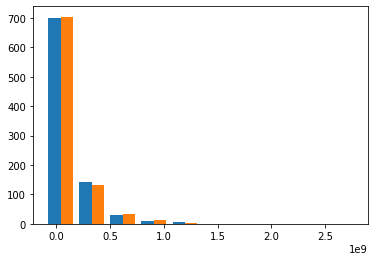

In [14]:
plt.hist([predicted,y_test])

In [15]:
model.score(X_test,y_test)

0.7796936832350332

In [16]:
residuals = y_test - predicted

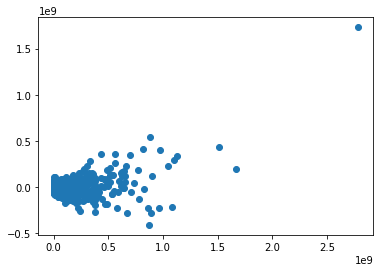

In [17]:
plt.scatter(y_test,residuals)

In [18]:
ap_residuals = np.abs(residuals) / y_test

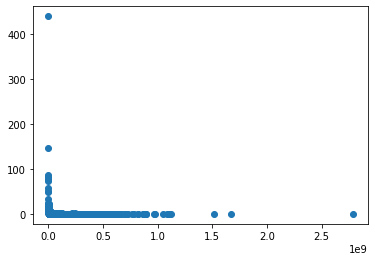

In [19]:
plt.scatter(y_test,ap_residuals)

In [20]:
lap_residuals = np.log(ap_residuals)

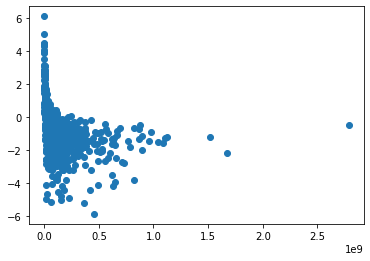

In [21]:
plt.scatter(y_test,lap_residuals)

(array([0.00112486, 0.00112486, 0.00112486, 0.00112486, 0.00112486,
        0.00224972, 0.00337458, 0.0056243 , 0.00787402, 0.00899888,
        0.00899888, 0.01237345, 0.01237345, 0.01237345, 0.01687289,
        0.01799775, 0.01912261, 0.02362205, 0.02587177, 0.02812148,
        0.02924634, 0.02924634, 0.03824522, 0.04274466, 0.05511811,
        0.06411699, 0.07424072, 0.08436445, 0.09898763, 0.10911136,
        0.12373453, 0.14060742, 0.16197975, 0.18335208, 0.22047244,
        0.24971879, 0.28458943, 0.32508436, 0.36220472, 0.39482565,
        0.43982002, 0.48368954, 0.53430821, 0.57817773, 0.61079865,
        0.64904387, 0.68728909, 0.71878515, 0.74353206, 0.77165354,
        0.80089989, 0.82452193, 0.8447694 , 0.85489314, 0.86951631,
        0.8807649 , 0.89538808, 0.90551181, 0.91451069, 0.92125984,
        0.928009  , 0.93813273, 0.94713161, 0.95275591, 0.9583802 ,
        0.96287964, 0.96287964, 0.9640045 , 0.96625422, 0.9696288 ,
        0.97412823, 0.97525309, 0.98312711, 0.98

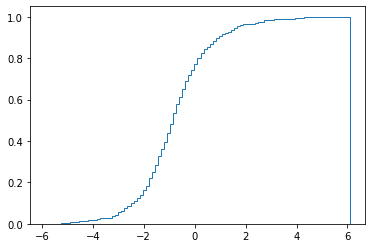

In [23]:
plt.hist(lap_residuals, bins = 100, density = 1, histtype = 'step', cumulative = True)

In [29]:
X.columns

Index(['production_budget', 'title_year', 'aspect_ratio', 'duration.1',
       'cast_total_facebook_likes', 'budget', 'imdb_score', 'opening_gross',
       'screens'],
      dtype='object')

In [31]:
for i in zip(list(X.columns),list(model.coef_)):
    print(i)

('production_budget', 1.3620758683466856)
('title_year', 180279.6094456081)
('aspect_ratio', -34619310.35724382)
('duration.1', 287967.7263264876)
('cast_total_facebook_likes', -142.15147628596938)
('budget', -0.002528443337509252)
('imdb_score', 25933090.41336239)
('opening_gross', 5.811558761819226)
('screens', -12070.051729808694)
